In [131]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import time
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data_concelhos.csv')

In [5]:
df = df.fillna(0)
df1 = df1.fillna(0)

In [6]:
df = pd.DataFrame([df['data'], df['confirmados'], df['recuperados'], df['obitos'], df['suspeitos'], df['ativos']])

In [7]:
df = df.T

In [72]:
df.head(273)

,data,confirmados,recuperados,obitos,suspeitos,ativos
0,26-02-2020,0,0,0,25,0
1,27-02-2020,0,0,0,51,0
2,28-02-2020,0,0,0,59,0
3,29-02-2020,0,0,0,70,0
4,01-03-2020,0,0,0,85,0
...,...,...,...,...,...,...
268,20-11-2020,249498,163000,3762,0,82736
269,21-11-2020,255970,169379,3824,0,82767
270,22-11-2020,260758,172919,3897,0,83942
271,23-11-2020,264802,176827,3971,0,84004


In [9]:
df1 =pd.DataFrame([df1['data'],df1['PÓVOA DE VARZIM'],df1['VILA DO CONDE'],df1['MATOSINHOS'],df1['PORTO'],df1['VILA NOVA DE GAIA'], df1['GONDOMAR'],df1['MAIA'],df1['TROFA'],df1['SANTO TIRSO'],df1['VALONGO'],df1['PAÇOS DE FERREIRA'],df1['PAREDES'],df1['LOUSADA'],df1['PENAFIEL'],df1['FELGUEIRAS'],df1['AMARANTE'], df1['MARCO DE CANAVESES'],df1['BAIÃO']])

In [10]:
df1=df1.T

In [11]:
cols = df.keys()
cols1 = df1.keys()

In [73]:
df1.head(273)

,data,PÓVOA DE VARZIM,VILA DO CONDE,MATOSINHOS,PORTO,VILA NOVA DE GAIA,GONDOMAR,MAIA,TROFA,SANTO TIRSO,VALONGO,PAÇOS DE FERREIRA,PAREDES,LOUSADA,PENAFIEL,FELGUEIRAS,AMARANTE,MARCO DE CANAVESES,BAIÃO
0,24-03-2020,0,8,54,126,68,56,104,0,7,65,5,7,29,6,17,0,3,0
1,25-03-2020,0,8,56,137,83,62,119,0,8,71,10,8,27,7,17,0,4,0
2,26-03-2020,13,12,81,259,163,114,157,8,13,100,19,16,33,11,24,0,0,0
3,27-03-2020,15,15,107,317,262,149,171,8,20,108,22,18,38,11,26,3,0,0
4,28-03-2020,15,22,189,343,262,153,219,14,24,139,22,21,38,13,26,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,28-09-2020,585,895,1538,1802,2275,1240,1115,219,500,859,544,557,537,366,564,145,184,133
118,05-10-2020,607,930,1570,1957,2421,1289,1167,222,513,908,614,585,601,368,596,153,189,139
119,12-10-2020,656,982,1681,2320,2589,1370,1237,231,551,986,738,650,660,390,634,179,230,142
120,19-10-2020,705,1054,1929,2884,2888,1523,1418,268,662,1160,1303,890,919,566,788,282,351,148


In [13]:
df2 = df.drop(['data'], axis=1)

# Stats

In [14]:
lethality_rt = ((df.loc[273, cols[3]])/(df.loc[273, cols[1]]))*100

In [15]:
lethality_rt = round(lethality_rt,2)

In [16]:
lt_rt = str(lethality_rt)

In [17]:
print("The lethality rate is " + lt_rt + " %")

The lethality rate is 1.51 %


In [18]:
recovery_rt = ((df.loc[273, cols[2]])/(df.loc[273, cols[1]]))*100

In [19]:
recovery_rt = round(recovery_rt, 2) 

In [20]:
rc_rt = str(recovery_rt)

In [21]:
print("The recovery rate is " + rc_rt + " %")

The recovery rate is 69.11 %


In [22]:
df_stats = df[['confirmados','recuperados','obitos','suspeitos','ativos']]

In [23]:
standardizer=StandardScaler()

In [24]:
df_stats.head()

,confirmados,recuperados,obitos,suspeitos,ativos
0,0,0,0,25,0
1,0,0,0,51,0
2,0,0,0,59,0
3,0,0,0,70,0
4,0,0,0,85,0


In [25]:
scaler=standardizer.fit(df_stats)

In [26]:
df_stats_Stand=scaler.transform(df_stats)

# HeatMap

In [27]:
XfeaturesArray=zip(df2['confirmados'], df2['recuperados'], df2['obitos'], df2['suspeitos'], df2['ativos'])
Xfeatures=list(XfeaturesArray)
Y=df2['confirmados']

In [28]:
X=standardizer.fit_transform(Xfeatures)

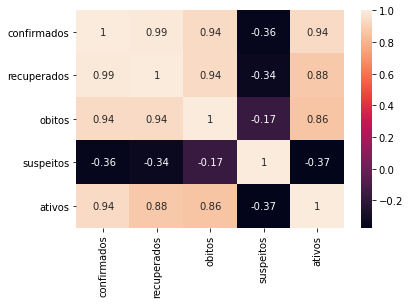

In [29]:
df2 = pd.DataFrame(X, columns=['confirmados','recuperados', 'obitos', 'suspeitos', 'ativos'])
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [30]:
print(cols,cols1)

Index(['data', 'confirmados', 'recuperados', 'obitos', 'suspeitos', 'ativos'], dtype='object') Index(['data', 'PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'],
      dtype='object')


In [31]:
confirmed = df.loc[:, cols[1]]
deaths = df.loc[:, cols[3]]
recoveries = df.loc[:, cols[2]]

In [32]:
cols1

Index(['data', 'PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'],
      dtype='object')

# PieChart dos casos confirmados nos concelhos do Porto

In [33]:
Z = df1.loc[121,cols1[1]:cols1[-1]]

In [34]:
casos_Porto = Z.sum()

In [35]:
casos_Porto

23815.0

In [36]:
percent_list=[]

In [37]:
for row in Z:
#    s = print((row*100)/casos_Porto)
    percent_list.append((row*100)/casos_Porto)

In [38]:
print(percent_list)

[3.2668486248162925, 4.996850724333403, 10.186857022884736, 14.730212051228218, 13.630065085030443, 7.306319546504304, 6.920008398068444, 1.31009867730422, 3.451606130589964, 5.677094268318287, 7.747218139827839, 4.333403317237035, 5.261389880327525, 2.859542305269788, 4.1066554692420745, 1.5032542515221499, 2.0365315977325213, 0.6760445097627545]


In [39]:
percent_list = [3.2668486248162925, 4.996850724333403, 10.186857022884736, 14.730212051228218, 13.630065085030443, 7.306319546504304, 6.920008398068444, 1.31009867730422, 3.451606130589964, 5.677094268318287, 7.747218139827839, 4.333403317237035, 5.261389880327525, 2.859542305269788, 4.1066554692420745, 1.5032542515221499, 2.0365315977325213, 0.6760445097627545]

rounded_perc = [round(num, 1) for num in percent_list]

In [40]:
def pie_chart():
    plt.pie(percent_list, labels=['PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=3.2)

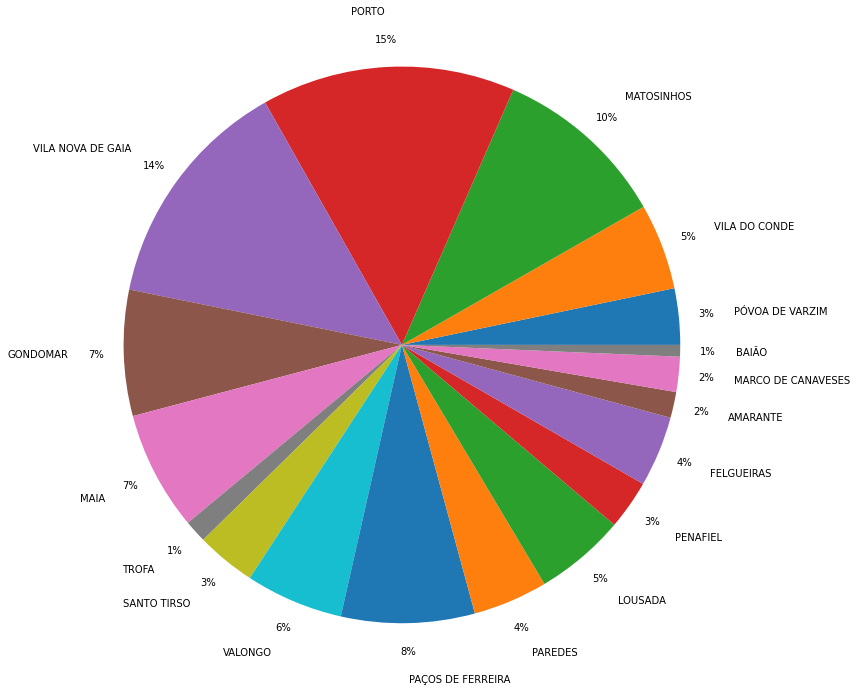

In [41]:
pie_chart()

# Regressão Linear

In [42]:
confirmed = df.loc[:, cols[1]]
deaths = df.loc[:, cols[3]]

In [43]:
confirmed.shape

(286,)

In [44]:
deaths.shape

(286,)

In [45]:
jh=np.array(df['ativos'])
hj =np.array(df['confirmados'])

In [46]:
Comparar confirmados com obitos

SyntaxError: invalid syntax (<ipython-input-46-b45dfca09c43>, line 1)

In [47]:
X = np.vstack((jh, hj)).T

In [48]:
jk = np.array(df['obitos'])
kj = np. array(df['recuperados'])

In [49]:
y = np.vstack((jk, kj)).T

In [50]:
X.ndim

2

In [51]:
y.ndim

2

In [52]:
lnr=LinearRegression()
lnr.fit(X,y)
lnr.intercept_

array([ 756.90913037, -756.6949499 ])

In [53]:
lnr.coef_

array([[-0.00987277,  0.01640735],
       [-0.99014072,  0.98359227]])

In [54]:
lnr.score(X, y)

0.9453605323019525

In [55]:
X_Test=X.copy()

In [56]:
y_Test = y.copy()

In [57]:
test=LinearRegression()
test.fit(X,y)
test.intercept_

array([ 756.90913037, -756.6949499 ])

In [58]:
test_pred = test.predict(X_Test)

In [59]:
print('Coefficients: \n', test.coef_)

Coefficients: 
 [[-0.00987277  0.01640735]
 [-0.99014072  0.98359227]]


In [60]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_Test, test_pred))

Mean squared error: 124094.39


In [61]:
print('Coefficient of determination: %.2f'
      % r2_score(y_Test, test_pred))

Coefficient of determination: 0.95


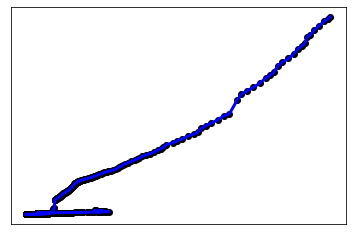

In [62]:
plt.scatter(X_Test, y_Test,  color='black')
plt.plot(X_Test, y_Test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Clusters

In [63]:
df3 = df[['recuperados','obitos']]

In [64]:
df3

,recuperados,obitos
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
281,229018,4724
282,234038,4803
283,240203,4876
284,243055,4963


In [65]:
df.dtypes

data           object
confirmados    object
recuperados    object
obitos         object
suspeitos      object
ativos         object
dtype: object

In [83]:
df1.loc[:,'PORTO']=pd.to_numeric(df1.loc[:,'PORTO'])
df1.loc[:,'VILA NOVA DE GAIA']=pd.to_numeric(df1.loc[:,'VILA NOVA DE GAIA'])

In [84]:
df1.dtypes

data                  object
PÓVOA DE VARZIM       object
VILA DO CONDE         object
MATOSINHOS            object
PORTO                  int64
VILA NOVA DE GAIA      int64
GONDOMAR              object
MAIA                  object
TROFA                 object
SANTO TIRSO           object
VALONGO               object
PAÇOS DE FERREIRA     object
PAREDES               object
LOUSADA               object
PENAFIEL              object
FELGUEIRAS            object
AMARANTE              object
MARCO DE CANAVESES    object
BAIÃO                 object
dtype: object

Text(0, 0.5, ' ')

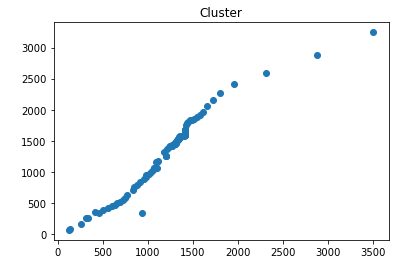

In [85]:
plt.scatter(df1['PORTO'], df1['VILA NOVA DE GAIA'])
plt.title('Cluster')
plt.xlabel(' ')
plt.ylabel(' ')

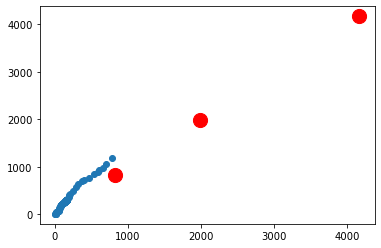

In [123]:
model1 = KMeans(n_clusters=3, init='k-means++', max_iter=10, n_init=5)
model1.fit_predict(df3)
plt.scatter(df1['PÓVOA DE VARZIM'],df1['VILA DO CONDE'])
plt.scatter(model1.cluster_centers_[:, 1], model1.cluster_centers_[:, 1], s=200, c='RED')
plt.show()

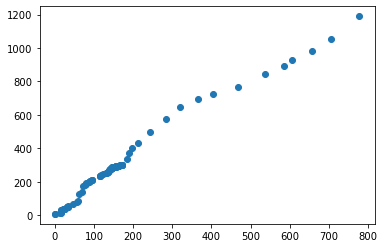

In [90]:
model1 = KMeans(n_clusters=10, init='k-means++', max_iter=10, n_init=1)
model1.fit_predict(df3)
plt.scatter(df1['PÓVOA DE VARZIM'],df1['VILA DO CONDE'])
plt.show()

In [67]:
%whos

Variable               Type              Data/Info
--------------------------------------------------
KMeans                 type              <class 'sklearn.cluster._kmeans.KMeans'>
KNeighborsClassifier   ABCMeta           <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LinearRegression       ABCMeta           <class 'sklearn.linear_mo<...>._base.LinearRegression'>
SimpleImputer          type              <class 'sklearn.impute._base.SimpleImputer'>
StandardScaler         type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                      ndarray           281x2: 562 elems, type `object`, 4496 bytes
Xfeatures              list              n=281
XfeaturesArray         zip               <zip object at 0x7fcccfeaf0c0>
Y                      Series            0           0\n1         <...>ength: 281, dtype: object
Z                      Series            PÓVOA DE VARZIM        77<...>nName: 121, dtype: object
casos_Porto            float             